## TEAM : PSYCHIC - PANDAS
* Team Members :
    * Anjana Eldo - 012488983
    * Anjana Kamath Miyar - 011526762
    * Mudrita Chaturvedi - 012418094
    * Vidya Coimbatore Nandakumar - 010816832

# Business Problem##

### **Hired by a Job Classified Company to provide better services to its user base.**


---



**Job advertisements often miss out the salary details while posting jobs online. Research shows that Salary is one of the important factors for candidates while applying for job openings. **

* **Missing Salary details creates dilemma for the candiate; whether to waste valuable time in investigating a low paying job or  run into the risk of ignoring a good opportunity.**


**We are using machine learning algorithms to provide accurate salary estimates for the  job postings for which true salary is not provided.
This will help users who are searching for jobs to filter out better and appropriate results based on their income needs so that they can use their time on jobs that match their profile and satisfies their requirments.**

##Data Source##
**For training and testing our model-**
* **We scraped data from indeed.com job portal using Data parsing library -* BeautifulSoup. * **
* **Features extracted were Title, Location, Company, Summary and Salary. **
* **The data was saved into a csv file. **
* **We split the data into  80 -20  to train and test our model using the csv. **
* **Furthermore, we performed two data enrichment steps to optimize our prediction accuracy.**
* **Enrichment 1: We merged our dataset with another dataset to add  * years of experience*. **
* **Enrichment 2: Added * Company Reviews * count to our data set which further helped us in improving our prediction.**



##Machine Learning Process

**For this project, we have used following steps to create our model.**
* **Data Selection**
* **Data Cleaning and Preparation**
* **Data transformation**
* **Splitting data into training and testing sets**
* **Applying Machine Learning Algorithm**
* **Accuracy Measurment**
* **Adding Features to improve accuracy**
* **Repeat last 3 steps till we get desired accuracy**

** All the above steps and there output are provided in detail in the notebook.** 

##Algorithms Used
* **GMM**
* **K-means**
* **Logistic Regression**
* **Linear Regression**
* **Decision Tree**
* **Random Forest**
* **K Nearest Neighbor**
* **Principal Component Analysis**
* **NaiveBayes**
* **Support Vector Machine**




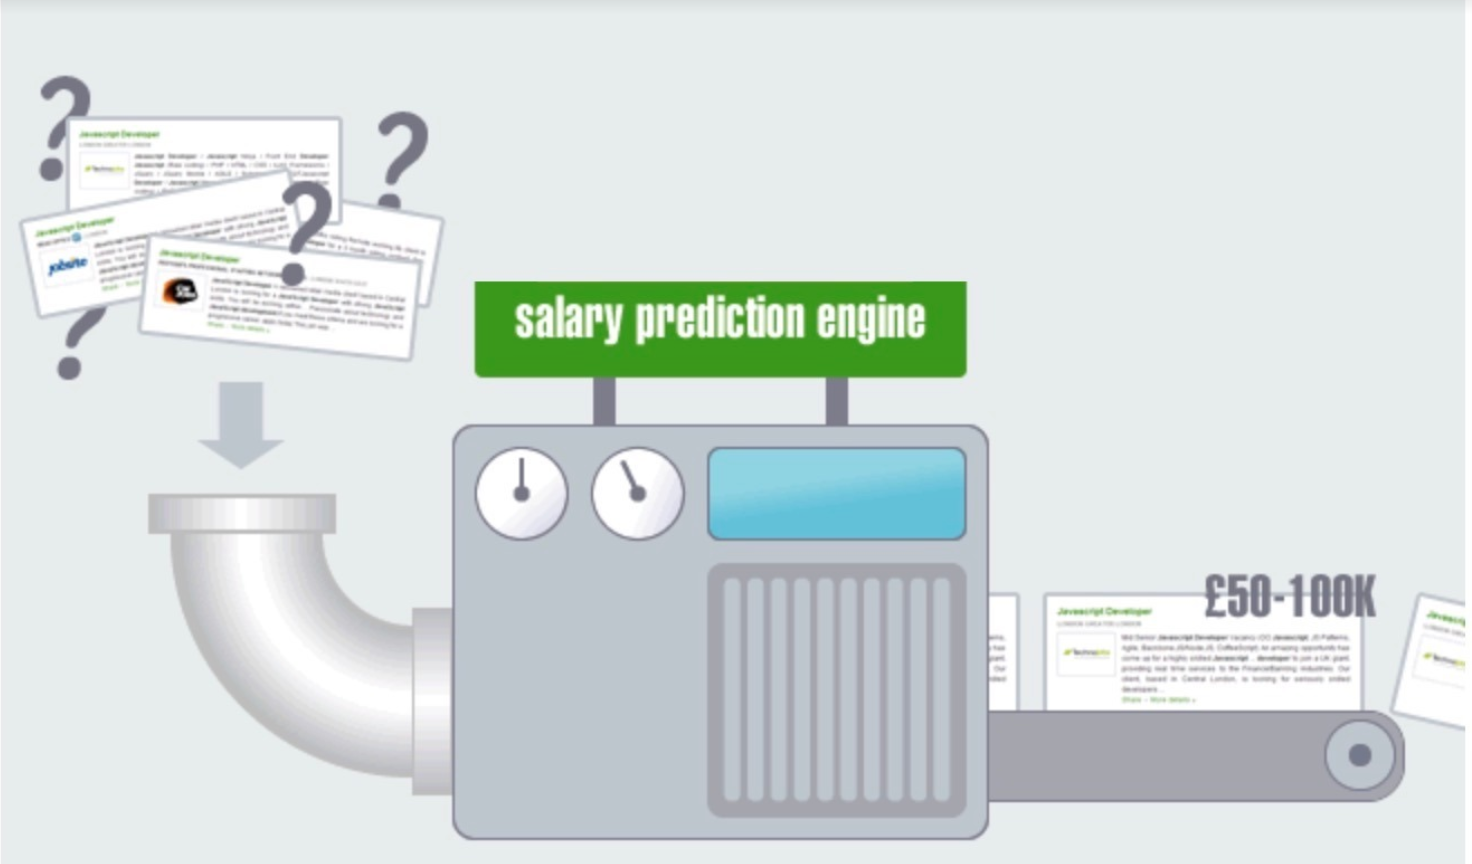

In [278]:

from IPython.display import Image
Image(filename = "/content/drive/My Drive/salpred.png")



## WEB SCRAPING **PROCESS**

In [0]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
from time import sleep
import pandas as pd
import numpy as np

In [0]:
URL = "https://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start=11"

#conducting a request of the stated URL above:
page = requests.get(URL)
#specifying a desired format of “page” using the html parser - this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, "html.parser")
#printing soup in a more structured tree format that makes for easier reading


In [439]:
#Retrieving Job Title
def extract_job_title_from_result(soup):
    jobs = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
            jobs.append(a["title"])
    return(jobs)
extract_job_title_from_result(soup)

['Data Scientist',
 'AI Research Scientist',
 'Data Scientist',
 'Data Scientist',
 'Bike Share Data Analyst',
 'Machine Learning Data Scientist',
 'Behavioral Scientist',
 'Data Scientist',
 'Quantitative Analysis, Full Time Analyst (North America - 2019)',
 'Associate Scientist--Clinical',
 'Summer Internship – Data Scientist',
 'Research Scientist',
 'Senior Data Scientist',
 'Data Scientist',
 'Data Scientist-Manager/ Sr Manager, Credit and Fraud Risk',
 'Research Scientist I - Chemical Development']

In [440]:
#Company Info
def extract_company_from_result(soup): 
    companies = []
    for div in soup.find_all(name="div", attrs={"class":"row"}):
        company = div.find_all(name="span", attrs={"class":"company"})
        if len(company) > 0:
            for b in company:
                companies.append(b.text.strip())
        else:
            sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
            for span in sec_try:
                companies.append(span.text.strip())
    return(companies)
extract_company_from_result(soup)

['Fora Financial LLC',
 'Bloomberg',
 'Biz2Credit Inc.',
 'Rex Global Staffing LLC',
 'New York City DEPARTMENT OF TRANSPORTATION',
 'Big Mirror Labs',
 'MRY',
 'Infomatics Corp',
 'Citi',
 'KornFerry Futurestep',
 'Lazard Ltd.',
 'Research Foundation for Mental Hygiene, Inc.',
 'Octane Lending',
 '05 Ascensia Diabetes Care US Inc.',
 'American Express',
 'Albany Molecular Research']

In [441]:
def extract_location_from_result(soup): 
    locations = []
    spans = soup.findAll('span', attrs={'class': 'location'})
    for span in spans:
        locations.append(span.text)
    return(locations)
extract_location_from_result(soup)

['New York, NY',
 'Manhattan, NY',
 'New York, NY 10014 (West Village area)',
 'New York, NY',
 'Manhattan, NY',
 'New York, NY 10261 (Murray Hill area)',
 'Melville, NY',
 'New York, NY',
 'Albany, NY 12203 (Campus Area-University District area)',
 'New York, NY 10018 (Clinton area)']

In [442]:
def extract_salary_from_result(soup): 
    salaries = []
    for td in soup.find_all(name="td", attrs={"class":"snip"}):
            try:
                divs = td.find('div', attrs={'class': ''})
                spans = divs.find('span', {'class': 'no-wrap'})
                salaries.append(spans.text.strip())
            except:
                salaries.append("Nothing_found")
    return(salaries)
extract_salary_from_result(soup)

['Nothing_found',
 'Nothing_found',
 '$50,000 - $65,000 a year',
 '$300,000 a year',
 '$52,143 - $78,997 a year',
 'Nothing_found',
 'Nothing_found',
 'Nothing_found',
 'Nothing_found',
 'Nothing_found',
 'Nothing_found',
 '$32,541 a year',
 '$140,000 - $180,000 a year',
 'Nothing_found',
 'Nothing_found',
 'Nothing_found']

In [443]:
def extract_summary_from_result(soup): 
    summaries = []
    spans = soup.findAll('span', attrs={'class': 'summary'})
    for span in spans:
        summaries.append(span.text.strip())
    return(summaries)
extract_summary_from_result(soup)

['A Day in the Life of a Data Scientist:. Identify new data sources/patterns that add significant lift to predictive modeling capabilities....',
 'The infrastructure and algorithms we develop are used across the company by data scientists. To extract relevant, meaningful, tradable, and actionable...',
 'As a Biz2Credit Data Scientist, you will shape the company’s data-centric culture, work closely with our engineering team to develop our analytics...',
 'Our client is an Investment Banking company in New York City. They are looking for an analytical/statistical/data science candidate. Seeking someone with an R...',
 'Develop analyses of data based on economic studies; Establish and monitor best practices, policies, procedures and documentation around bike share data;...',
 'Machine/Learning Data Scientist. Data Scientist & Software Engineer/Developer. 5+ years in Data Science. Extending company’s data with third party sources of...',
 'By combining owned and 3rd party consumer data wit

In [0]:
max_results_per_city = 100
city_set = ['New+York','Chicago','San+Francisco', 'Austin', 'Seattle', 'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Washington+DC', 'Boulder']
columns = ["city", "job_title", "company_name", "summary", "salary"]
sample_df = pd.DataFrame(columns = columns)

In [0]:
#!pip install lxml
%%bash
python3 -m pip install lxml
pip install six==1.10.0

In [456]:
for city in city_set:
    for start in range(0, max_results_per_city, 10):
        page = requests.get('http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=' + str(city) + '&start=' + str(start))
        time.sleep(1)  #ensuring at least 1 second between page grabs
        soup = BeautifulSoup(page.text, "html.parser", from_encoding="utf-8")
        for div in soup.find_all(name="div", attrs={"class":"row"}): 
            #specifying row num for index of job posting in dataframe
            num = (len(sample_df) + 1) 
            #creating an empty list to hold the data for each posting
            job_post = [] 
            #append city name
            job_post.append(city) 
            #grabbing job title
            for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
                job_post.append(a["title"]) 
            #grabbing company name
            company = div.find_all(name="span", attrs={"class":"company"}) 
            if len(company) > 0: 
                for b in company:
                    job_post.append(b.text.strip()) 
            else: 
                sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
                for span in sec_try:
                    job_post.append(span.text) 
            #grabbing location name
#             spans = div.findAll('span', attrs={'class': 'location'})
#             for span in spans:
#                 job_post.append(span.text.strip())
            #grabbing summary text
            d = div.findAll('span', attrs={'class': 'summary'}) 
            for span in d:
                job_post.append(span.text.strip()) 
            #grabbing salary
            #td = div.findAll('td', attrs={'class': 'snip'}) 
            for td in div.find_all(name="td", attrs={"class":"snip"}):
                try:
                    divs = td.find('div', attrs={'class': ''})
                    spans = divs.find('span', {'class': 'no-wrap'})
                    job_post.append(spans.text.strip())
                    flag = 1
                except:
                    job_post.append("Nothing_Found")
#             try:
#                 divs = td.find('div', attrs={'class': ''}).find('span', {'class': 'no-wrap'}).string
#                 job_post.append(divs.strip())
#             except:
#                 job_post.append('Nothing_found')
            #appending list of job post info to dataframe at index num
            
            sample_df.loc[num] = job_post
            
    #saving sample_df as a local csv file — define your own local path to save contents 
    sample_df.to_csv("/content/drive/My Drive/CSV/parse.csv", encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:179: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [466]:
#reading csv with index_col = 0, otherwise I get an additional
#unnamed column of separate index values
scrape_data = pd.read_csv("/content/drive/My Drive/CSV/parse.csv", index_col=0)
scrape_data.shape
#dropping any duplicate rows:
scrape_data = scrape_data.drop_duplicates()
scrape_data.reset_index(drop=True, inplace=True)
scrape_data.shape

(1838, 5)

In [467]:
scrape_data.head()

,city,job_title,company_name,summary,salary
0,New+York,Data Scientist,Biz2Credit Inc.,"As a Biz2Credit Data Scientist, you will shape...","$50,000 - $65,000 a year"
1,New+York,Data Scientist,Fora Financial LLC,A Day in the Life of a Data Scientist:. Identi...,Nothing_Found
2,New+York,Data Scientist,05 Ascensia Diabetes Care US Inc.,Experience in and understanding of data and in...,Nothing_Found
3,New+York,Research Scientist I - Analytical Chemist,Albany Molecular Research,"RESEARCH SCIENTIST I - Analytical in Albany, N...",Nothing_Found
4,New+York,"Data Scientist-Manager/ Sr Manager, Credit and...",American Express,"As a Data Scientist, you will be responsible f...",Nothing_Found


In [0]:
#some targeted cleaning of salary information to make parsing easier #—> remove “\n”, “$”, and “,”
scrape_data["salary"] = scrape_data["salary"].str.replace("\n", "")
scrape_data["salary"] = scrape_data["salary"].str.replace(",", "")
scrape_data["salary"] = scrape_data["salary"].str.replace("$", "")

In [0]:
scrape_data["og_salary_period"] = np.nan
#if the salary contains information on time period, save that time
#period string in the og_salary_period column
scrape_data.loc[scrape_data["salary"].str.contains("year"), "og_salary_period"] = "year"
scrape_data.loc[scrape_data["salary"].str.contains("month"), "og_salary_period"] = "month"
scrape_data.loc[scrape_data["salary"].str.contains("week"), "og_salary_period"] = "week"
scrape_data.loc[scrape_data["salary"].str.contains("day"), "og_salary_period"] = "day"
scrape_data.loc[scrape_data["salary"].str.contains("hour"), "og_salary_period"] = "hour"

In [0]:
#filtering out the results with salary data != “Nothing_found”
salary_data = scrape_data[scrape_data["salary"] != "Nothing_Found"]
#removing all rows in salary data from scrape data, and converting #all “Nothing_found” values to NaN, so that float salary values can #be easily reintegrated later
scrape_data = scrape_data[~scrape_data.isin(salary_data)].dropna(how='all')
scrape_data["salary"].replace("Nothing_Found",np.nan, inplace=True)
#scrape_data["salary"].astype('float')

In [471]:
scrape_data.shape

(1642, 6)

In [472]:
salary_data.head(10)

,city,job_title,company_name,summary,salary,og_salary_period
0,New+York,Data Scientist,Biz2Credit Inc.,"As a Biz2Credit Data Scientist, you will shape...",50000 - 65000 a year,year
8,New+York,Job opening for Data Analyst,maruthi,Create data tools for analytics and data scien...,50 - 80 an hour,hour
11,New+York,Chief Data Scientist (Quant),Bitcoin Investment Firm,As Chief Data Scientist you will be responsibl...,150000 - 250000 a year,year
24,New+York,Data Analyst / Data Scientist,Defined Clarity,We have a client that is looking for a data sc...,65 - 75 an hour,hour
25,New+York,Research Scientist I,New York State Psychiatry Institute,Seeking a qualified post-doctoral candidate to...,57416 a year,year
26,New+York,NLP and Machine Learning - Recent Grad,Mei Messaging,We combine data and machine learning to create...,25.00 - 25.50 an hour,hour
27,New+York,Data Scientist,Rex Global Staffing LLC,Our client is an Investment Banking company in...,300000 a year,year
30,New+York,Data Scientist,Biz2Credit Inc.,Work on data projects and proposals involving ...,50000 - 65000 a year,year
33,New+York,Bike Share Data Analyst,New York City DEPARTMENT OF TRANSPORTATION,Under the direction of the Executive Director ...,52143 - 78997 a year,year
39,New+York,Research Scientist,"Research Foundation for Mental Hygiene, Inc.","The Research Foundation for Mental Hygiene, In...",32541 a year,year


In [0]:
#separating out data based on whether contains hour, day, week, #month, year


year_salaries = salary_data.loc[salary_data["salary"].str.contains("year")]
month_salaries = salary_data.loc[salary_data["salary"].str.contains("month")]
week_salaries = salary_data.loc[salary_data["salary"].str.contains("week")]
day_salaries = salary_data.loc[salary_data["salary"].str.contains("day")]
hour_salaries = salary_data.loc[salary_data["salary"].str.contains("hour")]
# removing string values(“ a year”, “ a week”, etc. from salary dfs)
year_salaries["salary"] = year_salaries["salary"].str.replace(" a year", "")
month_salaries["salary"] = month_salaries["salary"].str.replace(" a month", "")
week_salaries["salary"] = week_salaries["salary"].str.replace(" a week", "")
day_salaries["salary"] = day_salaries["salary"].str.replace(" a day", "")
hour_salaries["salary"] = hour_salaries["salary"].str.replace(" an hour", "")

In [0]:
def split_sal(i):
    try:
        print(i)
        #splt = i.split(' - ',1)
        #splt = [int(s) for s in i.split() if s.isdigit() || if s.isfloat()]
        splt = []
        for t in i.split():
            try:
                splt.append(float(t))
            except ValueError:
                pass
        #print(splt)
#         print(splt[1])
        first = float(splt[0])
        #print(first)
        second = float(splt[1])
        #print(second)
        return (first + second)/2
    except:
        return float(i)

In [0]:
year_salaries["salary"] = year_salaries["salary"].apply(split_sal)
month_salaries["salary"] = month_salaries["salary"].apply(split_sal)
month_salaries["salary"] = month_salaries["salary"] * 12
week_salaries["salary"] = week_salaries["salary"].apply(split_sal)
week_salaries["salary"] = week_salaries["salary"] * 52
day_salaries["salary"] = day_salaries["salary"].apply(split_sal)
day_salaries["salary"] = day_salaries["salary"] * 260
hour_salaries["salary"] = hour_salaries["salary"].apply(split_sal)
hour_salaries["salary"] = hour_salaries["salary"] * 2080

In [0]:
#rejoining salary data into main scrape_data df
combined_salaries = pd.concat([year_salaries, month_salaries, week_salaries, day_salaries, hour_salaries], axis=0)
scrape_data = pd.concat([scrape_data, combined_salaries], axis=0)

In [0]:
#targeted replace of “r&d” in job titles and summaries with #“research development”, as I want to remove “&” 
#from listings as part of general clean-up
scrape_data["job_title"] = scrape_data["job_title"].str.replace("R&D", "research development")
scrape_data["summary"] = scrape_data["summary"].str.replace("R&D", "research development")

In [0]:
#creating data character cleaning function, and applying to all #columns, also lowercasing all string data for ease of later nlp
def data_clean(df, column):
    cleaning_list = ["+", "$","/",",","?",".",";","-","@","!","&","%","^","*",")","(", "\n"]
    for item in cleaning_list:
        df[column] = df[column].str.replace(item, " ")
        df[column] = df[column].str.lower()
#can’t clean the salary column due to float values, and don’t need #to clean og_salary, so keeping out of the for loop
for column in scrape_data.columns[0:len(scrape_data.columns)-2]:
    data_clean(scrape_data, column)

In [0]:
scrape_data.to_csv("/content/drive/My Drive/CSV/indeed-results.csv")

## **Importing CSV and data preparation**

In [0]:
import pandas as pd
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
from tflearn.data_utils import to_categorical
from collections import Counter, defaultdict
from sklearn.feature_extraction import stop_words
import seaborn as sns

In [0]:
import io
# # # Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# # # 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
# # # Load the Drive helper and mount
from google.colab import drive

# # # # This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

In [9]:
import pandas as pd
results = pd.read_csv("/content/drive/My Drive/CSV/indeed-results.csv")
results.head(5)

,location,title,company,salary,summary
0,"Charlotte, NC",Sr. Data Scientist,ACT-Consulting,$102 an hour,Coordinate and lead meetings to review the ove...
1,"San Mateo, CA",Jr. Data Scientist,Harnham,"$130,000 a year",Associate Data Scientist. This is an exciting ...
2,"Minneapolis, MN 55439",Sr. Data Scientist,RED SKY Consulting,"$120,000 a year","Data Architect, BI Architect, Data Scientist, ..."
3,"Manhattan, NY",Jr. Data Scientist,DEPARTMENT OF TRANSPORTATION,"$60,189 - $83,440 a year","Establish and monitor best practices, policies..."
4,"New York, NY",Jr. Data Scientist,"Envisagenics, Inc.","$65,000 - $110,000 a year",We are looking for experts in machine learning...


In [10]:
results.shape

(174, 5)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Most popular Job Titles

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


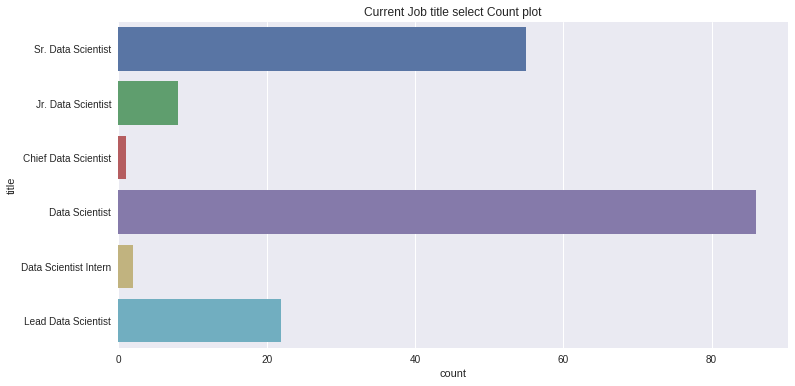

In [12]:
plt.figure(figsize=(12,6))
plt.title("Current Job title select Count plot")
sns.countplot(data=results,y="title")

## Data Wrangling & Preprocessing


In [0]:
salaries_sal = results[results.salary.notnull()]
salaries_summ = salaries_sal[salaries_sal.summary.notnull()]
salaries = salaries_summ[salaries_summ.company.notnull()]

In [14]:
salaries.dtypes

location    object
title       object
company     object
salary      object
summary     object
dtype: object

In [15]:
salaries.head()

,location,title,company,salary,summary
0,"Charlotte, NC",Sr. Data Scientist,ACT-Consulting,$102 an hour,Coordinate and lead meetings to review the ove...
1,"San Mateo, CA",Jr. Data Scientist,Harnham,"$130,000 a year",Associate Data Scientist. This is an exciting ...
2,"Minneapolis, MN 55439",Sr. Data Scientist,RED SKY Consulting,"$120,000 a year","Data Architect, BI Architect, Data Scientist, ..."
3,"Manhattan, NY",Jr. Data Scientist,DEPARTMENT OF TRANSPORTATION,"$60,189 - $83,440 a year","Establish and monitor best practices, policies..."
4,"New York, NY",Jr. Data Scientist,"Envisagenics, Inc.","$65,000 - $110,000 a year",We are looking for experts in machine learning...


In [16]:
salaries.shape

(157, 5)

In [0]:
salaries = salaries[(~salaries.salary.str.contains('an hour')) & (~salaries.salary.str.contains('a month'))
                   & (~salaries.salary.str.contains('a week')) & (~salaries.salary.str.contains('a day'))]

In [0]:
salaries.salary = salaries.salary.str.replace('a year', '').str.replace(',', '').str.replace('$', '')

In [19]:
salaries.shape

(141, 5)

In [0]:
for i in salaries.salary:
    if len(i.split('-')) != 1 and len(i.split('-')) != 2:
        print(i)

In [0]:
new_salaries = []
for i in salaries.salary:
    a = i.split('-')
    if len(a) == 2:
        new_salaries.append(np.mean([float(b) for b in a]))
    else:
        new_salaries.append(float(a[0]))

In [22]:
new_salaries[0:5]

[130000.0, 120000.0, 71814.5, 87500.0, 220000.0]

In [0]:
salaries.salary = new_salaries

In [24]:
salaries.head()

,location,title,company,salary,summary
1,"San Mateo, CA",Jr. Data Scientist,Harnham,130000.0,Associate Data Scientist. This is an exciting ...
2,"Minneapolis, MN 55439",Sr. Data Scientist,RED SKY Consulting,120000.0,"Data Architect, BI Architect, Data Scientist, ..."
3,"Manhattan, NY",Jr. Data Scientist,DEPARTMENT OF TRANSPORTATION,71814.5,"Establish and monitor best practices, policies..."
4,"New York, NY",Jr. Data Scientist,"Envisagenics, Inc.",87500.0,We are looking for experts in machine learning...
5,"New York, NY",Chief Data Scientist,Harnham,220000.0,Chief Data Scientist - Consulting. Chief Data ...


In [25]:
salaries.shape

(141, 5)

In [26]:
salaries.duplicated().sum()

0

In [27]:
salaries.isnull().sum()

location    0
title       0
company     0
salary      0
summary     0
dtype: int64

In [28]:
#display null columns

null_columns=salaries.columns[salaries.isnull().any()]
print(salaries[salaries.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [29]:
salaries.head()

,location,title,company,salary,summary
1,"San Mateo, CA",Jr. Data Scientist,Harnham,130000.0,Associate Data Scientist. This is an exciting ...
2,"Minneapolis, MN 55439",Sr. Data Scientist,RED SKY Consulting,120000.0,"Data Architect, BI Architect, Data Scientist, ..."
3,"Manhattan, NY",Jr. Data Scientist,DEPARTMENT OF TRANSPORTATION,71814.5,"Establish and monitor best practices, policies..."
4,"New York, NY",Jr. Data Scientist,"Envisagenics, Inc.",87500.0,We are looking for experts in machine learning...
5,"New York, NY",Chief Data Scientist,Harnham,220000.0,Chief Data Scientist - Consulting. Chief Data ...


In [0]:
##### dist plotting

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

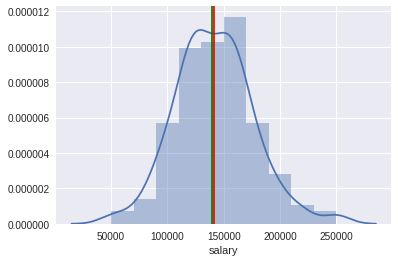

In [32]:
ax = sns.distplot(salaries['salary'], bins=10)
ax.axvline(salaries['salary'].mean(), c='r')
ax.axvline(salaries['salary'].median(), c='g')

In [0]:
twentieth = salaries['salary'].quantile(0.20)
eightieth = salaries['salary'].quantile(0.80)

In [34]:
median_salary = np.median(salaries.salary)
median_salary

140000.0

In [0]:
salaries['high_salary'] = [1 if i > median_salary else 0 for i in salaries.salary]

## Pre processing for vectorization

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split

In [37]:
## Count Number of words in each summary of job

salaries['word_count'] = salaries['summary'].apply(lambda x: len(str(x).split(" ")))
salaries[['summary','word_count']].head()

,summary,word_count
1,Associate Data Scientist. This is an exciting ...,23
2,"Data Architect, BI Architect, Data Scientist, ...",19
3,"Establish and monitor best practices, policies...",22
4,We are looking for experts in machine learning...,14
5,Chief Data Scientist - Consulting. Chief Data ...,22


In [38]:
## Count Number of characters in each summary of job

salaries['char_count'] = salaries['summary'].str.len() ## this also includes spaces
salaries[['summary','char_count']].head()

,summary,char_count
1,Associate Data Scientist. This is an exciting ...,159
2,"Data Architect, BI Architect, Data Scientist, ...",163
3,"Establish and monitor best practices, policies...",162
4,We are looking for experts in machine learning...,107
5,Chief Data Scientist - Consulting. Chief Data ...,154


In [0]:
#  !pip install nltk
# import nltk
#  nltk.download("popular")

In [43]:
#check for stop words

import nltk
#nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('english')

salaries['stopwords'] = salaries['summary'].apply(lambda x: len([x for x in x.split() if x in stop]))
salaries[['summary','stopwords']].head()

,summary,stopwords
1,Associate Data Scientist. This is an exciting ...,6
2,"Data Architect, BI Architect, Data Scientist, ...",0
3,"Establish and monitor best practices, policies...",4
4,We are looking for experts in machine learning...,3
5,Chief Data Scientist - Consulting. Chief Data ...,0


In [44]:
## make everything lowercase

salaries['summary'] = salaries['summary'].apply(lambda x: x.lower())
salaries['summary'].head()

1    associate data scientist. this is an exciting ...
2    data architect, bi architect, data scientist, ...
3    establish and monitor best practices, policies...
4    we are looking for experts in machine learning...
5    chief data scientist - consulting. chief data ...
Name: summary, dtype: object

In [45]:
salaries['title'] = salaries['title'].apply(lambda x: x.lower())
salaries['title'].head(10)

1       jr. data scientist
2       sr. data scientist
3       jr. data scientist
4       jr. data scientist
5     chief data scientist
6           data scientist
7           data scientist
8           data scientist
9           data scientist
10          data scientist
Name: title, dtype: object

In [46]:
salaries['title'] = salaries['title'].str.replace('[^\w\s]',' ')
salaries['title'].head(20)

1       jr  data scientist
2       sr  data scientist
3       jr  data scientist
4       jr  data scientist
5     chief data scientist
6           data scientist
7           data scientist
8           data scientist
9           data scientist
10          data scientist
11          data scientist
12          data scientist
13          data scientist
15          data scientist
16          data scientist
18          data scientist
19          data scientist
21          data scientist
22          data scientist
24          data scientist
Name: title, dtype: object

In [47]:
# Remove punctuations

salaries['summary'] = salaries['summary'].str.replace('[^\w\s]','')
salaries['summary'].head()


1    associate data scientist this is an exciting o...
2    data architect bi architect data scientist dat...
3    establish and monitor best practices policies ...
4    we are looking for experts in machine learning...
5    chief data scientist  consulting chief data sc...
Name: summary, dtype: object

In [0]:
import re
states = ['IA', 'KS', 'UT', 'VA', 'NC', 'NE', 'SD', 'AL', 'ID', 'FM', 'DE', 'AK', 'CT', 'PR', 'NM', 'MS', 'PW', 'CO', 'NJ', 'FL', 'MN', 'VI', 'NV', 'AZ', 'WI', 'ND', 'PA', 'OK', 'KY', 'RI', 'NH', 'MO', 'ME', 'VT', 'GA', 'GU', 'AS', 'NY', 'CA', 'HI', 'IL', 'TN', 'MA', 'OH', 'MD', 'MI', 'WY', 'WA', 'OR', 'MH', 'SC', 'IN', 'LA', 'MP', 'DC', 'MT', 'AR', 'WV', 'TX']
regex = re.compile(r'\b(' + '|'.join(states) + r')\b')
salaries['location'] = salaries['location'].str.replace(',', '').str.extract(regex)

In [49]:
salaries['location'].head(10)

1     CA
2     MN
3     NY
4     NY
5     NY
6     MA
7     CA
8     NY
9     NY
10    NY
Name: location, dtype: object

In [50]:
# Check for rare words

freq = pd.Series(' '.join(salaries['summary']).split()).value_counts()[-10:]
freq

consultancy      1
microsoft        1
them             1
thats            1
ensure           1
tb               1
california       1
plans            1
exponentially    1
actuarial        1
dtype: int64

In [0]:
# Correct Spellings

# import textblob
# from textblob import TextBlob
# salaries['summary'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [52]:
#Remove Stop words

stop = stopwords.words('english')
salaries['summary']  = salaries['summary'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
salaries['summary'].head()

1    associate data scientist exciting opportunity ...
2    data architect bi architect data scientist dat...
3    establish monitor best practices policies proc...
4    looking experts machine learning genomics rnas...
5    chief data scientist consulting chief data sci...
Name: summary, dtype: object

In [53]:
## Stemming

from nltk.stem import PorterStemmer
st = PorterStemmer()
salaries['summary'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
salaries['summary'].head()

1    associate data scientist exciting opportunity ...
2    data architect bi architect data scientist dat...
3    establish monitor best practices policies proc...
4    looking experts machine learning genomics rnas...
5    chief data scientist consulting chief data sci...
Name: summary, dtype: object

In [0]:
 #!pip install textblob

In [58]:
## Lemmatization

from textblob import Word
salaries['summary'] = salaries['summary'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
salaries['summary'].head()

1    associate data scientist exciting opportunity ...
2    data architect bi architect data scientist dat...
3    establish monitor best practice policy procedu...
4    looking expert machine learning genomics rnase...
5    chief data scientist consulting chief data sci...
Name: summary, dtype: object

In [59]:
###replace everything except the letters and numbers in the spaces.


salaries['summary'] = salaries['summary'].replace('[^a-zA-Z0-9]', ' ', regex = True)
salaries['summary'].head(5)


1    associate data scientist exciting opportunity ...
2    data architect bi architect data scientist dat...
3    establish monitor best practice policy procedu...
4    looking expert machine learning genomics rnase...
5    chief data scientist consulting chief data sci...
Name: summary, dtype: object

In [61]:
salaries.shape

(141, 9)

In [62]:
salaries.summary.count()

141

In [0]:
#reset Index

salaries.reset_index(drop= True, inplace=True)
#salaries.head(40)


In [64]:
salaries.location.value_counts().index

Index(['CA', 'NY', 'IL', 'PA', 'MA', 'DC', 'VA', 'TX', 'WA', 'OR', 'GA', 'NC',
       'MN', 'MO', 'CO', 'OH', 'DE', 'FL', 'AZ'],
      dtype='object')

## Vectorize Summary column using Tfidf Vectorizer & apply PCA

In [0]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X_tfidf = vectorizer.fit_transform(X_train) 
# print(X_tfidf)
# vect = CountVectorizer().fit(X_train)
# vect

In [0]:

# used words (axis in our multi-dimensional space)
# vectorizer.get_feature_names()[::2]


In [0]:
# from sklearn.decomposition import PCA
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.pipeline import Pipeline
# pipeline = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
# ])        
# Xtrain = pipeline.fit_transform(X_train).todense()
# Xtest = pipeline.fit_transform(X_test).todense()

# pca_xtrain = PCA(n_components=1).fit(Xtrain)
# pca_xtest = PCA(n_components=1).fit(Xtest)

# X_train_data = pca_xtrain.transform(Xtrain)
# X_test_data = pca_xtest.transform(Xtest)

# X_train_data
#plt.scatter(data2D[:,0], data2D[:,1], c='r')
#plt.show() 

### Split Train and Test Data

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(salaries['summary'], salaries['salary'],test_size = 0.33,random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.head()

(94,)
(47,)
(94,)
(47,)


85     data science data scientist director head vp b...
48     fast growing data analytics consulting shop lo...
135    master degree operation research applied stati...
13     scientific programming experience matlab r pyt...
92     leading provider mortgage software solution fo...
Name: summary, dtype: object

In [68]:
print('X_train first entry: \n\n', X_train[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry: 

 associate data scientist exciting opportunity anyone looking utilize data analytics machine learning inform decision whilst


X_train shape:  (94,)


### Apply CountVectorizer & TfidfVectorizer

In [0]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

In [70]:
vect.get_feature_names()[::300]

['200k', 'natural']

In [71]:
len(vect.get_feature_names())

490

In [72]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<94x490 sparse matrix of type '<class 'numpy.int64'>'
	with 1279 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_vectorized, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
from sklearn.metrics import r2_score
predictions = model.predict(vect.transform(X_test))
print("R^2 score for Linear Regression: ",model.score(vect.transform(X_test), y_test))

R^2 score for Linear Regression:  -0.5298735613086218


In [75]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['200k']

Largest Coefs: 
['200k']



In [76]:
#Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

53

In [77]:
X_train_vectorized = vect.transform(X_train)

model = LinearRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print("R^2 score for Linear Regression: ",model.score(vect.transform(X_test), y_test))

R^2 score for Linear Regression:  -2.093737618323436


In [0]:
salaries_w_desc = salaries[salaries.summary.notnull()]

X_title = salaries_w_desc.title
y_title = salaries_w_desc.high_salary

In [79]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_title)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
X_title_trans = pd.DataFrame(cv.transform(X_title).todense(), columns=cv.get_feature_names())

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_title_trans, y_title, test_size=0.3, random_state=59)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("R^2 score for Linear Regression: ",model.score(X_title_trans.as_matrix(), y_title.as_matrix()))

R^2 score for Linear Regression:  0.11828064856047837


In [0]:
X_loc = salaries_w_desc.title


In [0]:
salaries.location = pd.Categorical(salaries.location)
salaries['loc_code'] = salaries.location.cat.codes
columns = ['word_count','char_count','stopwords']
salaries.drop(columns, inplace=True, axis=1)
salaries.to_csv("/content/drive/My Drive/CSV/indeed-results_final.csv", index=False, encoding="utf-8")

In [85]:
#columns = ['location','title', 'company', 'summary', 'high_salary', 'word_count','char_count','stopwords']
#remove white spaces in columns names:
final = pd.read_csv("/content/drive/My Drive/CSV/indeed-results_final.csv")
final.head()
salaries_reg = final
salaries_reg.head()

,location,title,company,salary,summary,high_salary,loc_code
0,CA,jr data scientist,Harnham,130000.0,associate data scientist exciting opportunity ...,0,1
1,MN,sr data scientist,RED SKY Consulting,120000.0,data architect bi architect data scientist dat...,0,9
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,71814.5,establish monitor best practice policy procedu...,0,12
3,NY,jr data scientist,"Envisagenics, Inc.",87500.0,looking expert machine learning genomics rnase...,0,12
4,NY,chief data scientist,Harnham,220000.0,chief data scientist consulting chief data sci...,1,12


In [86]:

salaries_reg.columns



Index(['location', 'title', 'company', 'salary', 'summary', 'high_salary',
       'loc_code'],
      dtype='object')

## K- MEANS

*  **With the data we wrangled it was not possible to carry out clustering.**
*  **So we enriched the dataset by adding experience to the dataset.**
*  **We are trying to cluster the dataset based on the salary and experience**
*  **This would give us an idea about how much experience is necessary to have the desired salary**



In [87]:
salaries.head()

,location,title,company,salary,summary,high_salary,loc_code
0,CA,jr data scientist,Harnham,130000.0,associate data scientist exciting opportunity ...,0,1
1,MN,sr data scientist,RED SKY Consulting,120000.0,data architect bi architect data scientist dat...,0,9
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,71814.5,establish monitor best practice policy procedu...,0,12
3,NY,jr data scientist,"Envisagenics, Inc.",87500.0,looking expert machine learning genomics rnase...,0,12
4,NY,chief data scientist,Harnham,220000.0,chief data scientist consulting chief data sci...,1,12


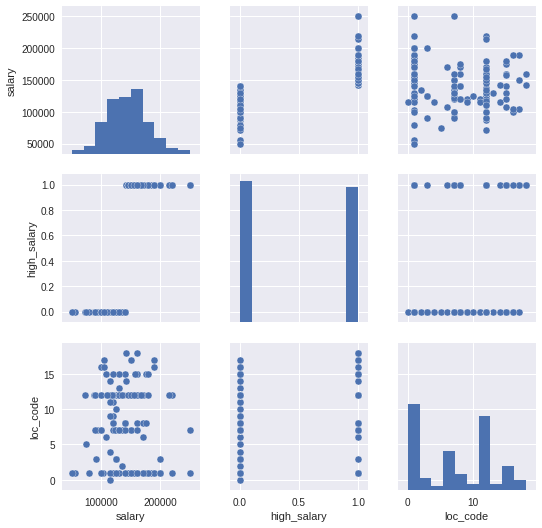

In [88]:
sns.pairplot(salaries)

## **Data Enrichment 1-**
* **When visualizing the dataset with Pair-plot, we found fewer significant features.**
* **We decided to enrich the dataset by adding Years of Experience as a feature.**
* ** As the pairplot did not show any relationship with the existing features to carry out clustering, adding experience as a feature helped to obtain a relationship between experiene and salary as seen in the second pairplot.**

In [0]:
import pandas as pd
# results = pd.read_csv("/content/drive/My Drive/CSV/indeed-results.csv")
# results.head(5)
salaries = None
salaries = pd.read_csv("/content/drive/My Drive/CSV/indeed_enriched.csv")
# salaries["comp_code"] = enriched_dataset["comp_code"]
# salaries["experience"] = enriched_dataset["experience"]
#salaries.drop("Unnamed:0",axis=1)

In [90]:
salaries.head(5)
#salaries.shape

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


In [0]:
salaries.to_csv("indeed_enriched.csv")

## * **Plotted pairplot using sns to understand the patterns of various features**

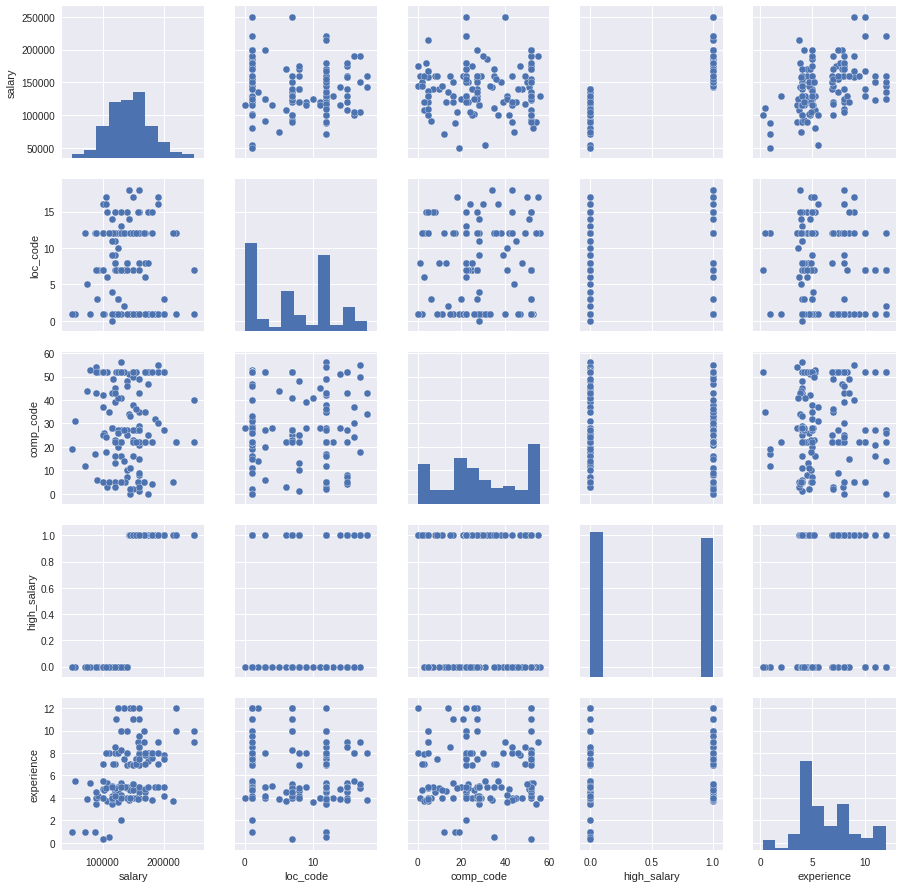

In [92]:
sns.pairplot(salaries)

In [93]:
salaries.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


* From the pairplot we understood that salary and experience can help us understand the patterns

### Elbow method to find the optimal number of clusters

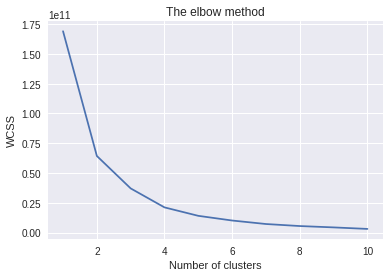

In [94]:
from sklearn.cluster import KMeans

X = salaries.iloc[:, [4,8]].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
X_kmeans = salaries[["experience","salary"]]

In [96]:
salaries.head(5)

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


* We got number of clusters as 4 from the elbow method and applied to KMeans algorithm

In [0]:
kmeans = KMeans(n_clusters = 4,n_init = 10, max_iter = 300, init = 'k-means++',random_state = 0)
kmeans.fit(X_kmeans)
labels = kmeans.predict(X_kmeans)
centroids = kmeans.cluster_centers_

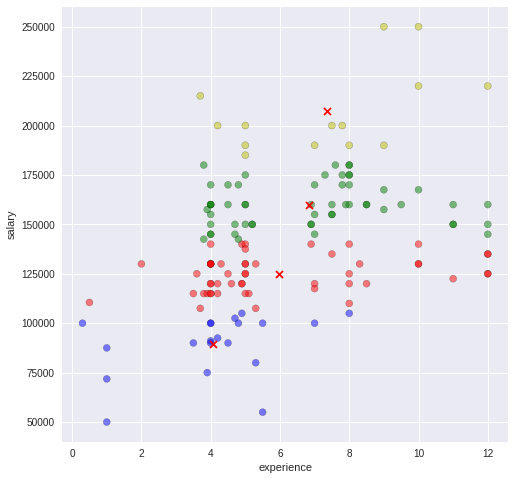

In [98]:
import numpy as np
fig = plt.figure(figsize=(8,8))

colmap = {1:'r', 2:'g',3:'y',4:'blue'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(salaries['experience'], salaries['salary'], color=colors1, alpha=0.5, edgecolor='k')
plt.xlabel('experience')
plt.ylabel('salary')
#plt.ylim([0, 17500])
#plt.yticks(np.arange(0, 17500, 2500))
#for idx, centroid in enumerate(centroids):
#    plt.scatter(*centroid, color=colmap[idx+1])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r')

plt.show()

* As is seen from the graph the clusters are not very cohesive.
* People with experience in the range 4 - 12 are highly paid.
* But we cannot conclude this from the visulaizations

### Accuracy Score Kmeans

In [99]:
from sklearn import metrics
sil_score = metrics.silhouette_score(X_kmeans, labels)
sil_score

0.5564368594366712

* Kmeans gave us a score of 55%. 
* We then tried to apply GMM on the above dataset

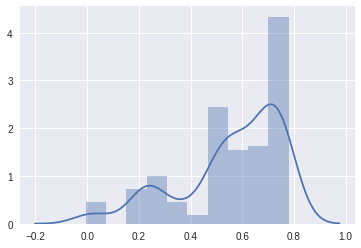

In [100]:
scores = metrics.silhouette_samples(X, labels)
sns.distplot(scores);

* **Although the job data does not perfectly fit to K-means cluster analysis, it was used as a 
data source for analysis to identify what patterns exist in the data set.**

## GMM

In [0]:
from matplotlib.patches import Ellipse
import numpy as np
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    #ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

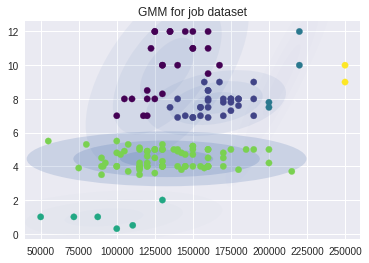

In [102]:
from sklearn.mixture import GaussianMixture

X_gmm = salaries.iloc[:, [4,8]].values

gmm = GaussianMixture(n_components=6,covariance_type='full',verbose=0,verbose_interval=10,max_iter=5000).fit(X_gmm)
labels = gmm.predict(X_gmm)


plt.title("GMM for job dataset")
plot_gmm(gmm,X_gmm)

* When GMM was used we could see many outliers and the data did not fit gmm properly

### Accuracy Score GMM

In [103]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
number_of_components=6
silhoutte_coefficients = []
gmm = GaussianMixture(n_components=number_of_components,covariance_type='spherical',verbose=0,verbose_interval=10,max_iter=5000).fit(X_gmm)
gmm_labels = gmm.predict(X_gmm)
gmm_silhoute_score = metrics.silhouette_score(X_gmm, gmm_labels, metric='euclidean')
gmm_silhoute_score

0.5354429410023652

* **The accuracy score is lower than that of Kmeans**

## **AIC/BIC**

**We applied Akaike Information criteria(AIC) and Bayesian Information Criteria(BIC) to see the quality of the model.**
* **BIC also helps to assess the number of clusters**
* **The lower the value the better the model.**




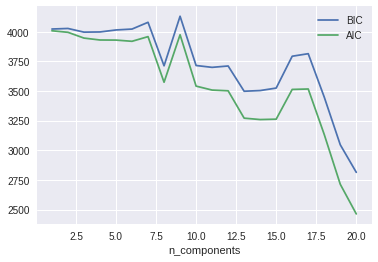

In [104]:
import numpy as np
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_gmm)
          for n in n_components]

plt.plot(n_components, [m.bic(X_gmm) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_gmm) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

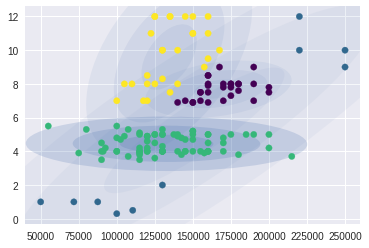

In [105]:
gmm = GaussianMixture(n_components=4, covariance_type='full',random_state=42)
plot_gmm(gmm, X_gmm)

* **GMM gave a very low score as the job data did not fit for GMM Model. Again it was used to generalize the pattern
that is present in the dataset.**

## PCA

* **We then tried to analyse the features using pca.**
* **We grouped together salary,experience and location code.**
* **This made sense as it would help the person to search for jobs in a location of his interest if it has salary person desires.**

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = salaries[['experience','loc_code','comp_code']]
X_Scaled = StandardScaler().fit_transform(X)
#X_Scaled

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_Scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2'])

In [108]:
salaries.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


In [109]:
principalDf.head(5)

,PC1,PC2
0,-0.270285,-0.544246
1,0.477782,-0.068275
2,-2.143763,-0.378812
3,-2.006375,-0.617533
4,0.491557,1.620218


In [0]:
pca_x = pd.concat([principalDf, salaries[['high_salary']]], axis = 1)

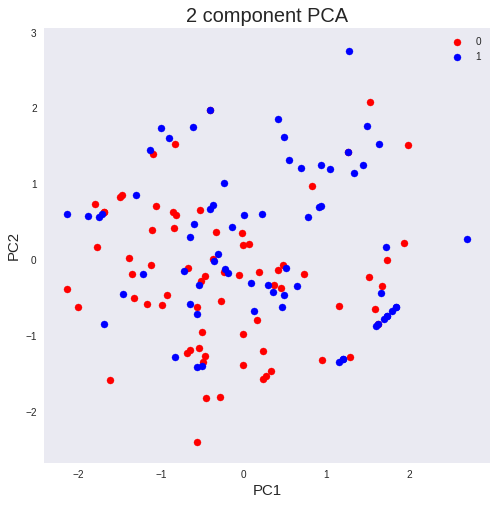

In [111]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_x['high_salary'] == target
    ax.scatter(pca_x.loc[indicesToKeep, 'PC1']
               , pca_x.loc[indicesToKeep,'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

* **We did pca for 2 components**

In [0]:
x = principalDf.iloc[:,[0,1]].values

In [113]:
gmm = GaussianMixture(n_components=4)
gmm.fit(x)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm

array([3, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 2, 3, 3, 2, 3, 2, 3, 3,
       3, 2, 2, 3, 2, 3, 0, 3, 0, 2, 2, 2, 3, 0, 2, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 3, 3, 0, 1, 1, 0, 1, 1, 1, 3, 1, 2, 1, 0, 2,
       1, 2, 3, 3, 2, 3, 3, 2, 1, 0, 3, 0, 2, 3, 3, 1, 3, 3, 3, 2, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 1, 2])

In [0]:
import matplotlib as mpl
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(5-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Indeed Dataset");


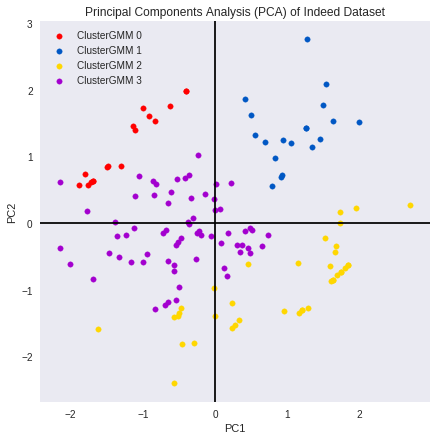

In [115]:
df_plot = principalDf.copy()
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

In [116]:
score = metrics.silhouette_score(x, y_cluster_gmm)
score

0.31787291650271665

* **The score did not improve.**
* **Next we tried to do hierarchical clustering on the same dataset to see if the score would improve.**

## Hierarchichal Clustering

Text(0,0.5,'weight in pounds')

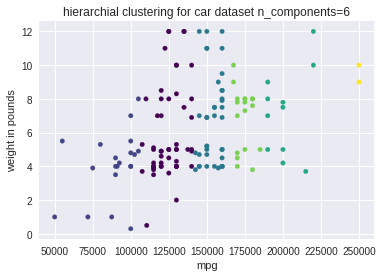

In [117]:
from sklearn.cluster import AgglomerativeClustering
number_of_components=6
HC = AgglomerativeClustering(n_clusters=number_of_components, linkage='ward')
x_hierarchy = salaries.iloc[:, [4,8]].values

HC.fit(x_hierarchy)
test_features= ['mpg','weightlbs']

plt.scatter(x_hierarchy[:, 0], x_hierarchy[:, 1], c=HC.labels_, s=20, cmap='viridis');
plt.title("hierarchial clustering for car dataset n_components=6")
plt.xlabel("mpg")
plt.ylabel("weight in pounds")

### Accuracy Score Hierarchical

In [118]:
HC_silhoute_score = metrics.silhouette_score(x_hierarchy, HC.labels_, metric='euclidean')
HC_silhoute_score

0.5593492686872867

* **The score is similar to that of kmeans and GMM**

## Comparing clustering Methods

In [119]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients = []
gmm = GaussianMixture(n_components=number_of_components,covariance_type='spherical',verbose=0,verbose_interval=10,max_iter=5000).fit(X_gmm)
gmm_labels = gmm.predict(X_gmm)
gmm_silhoute_score = silhouette_score(X_gmm, gmm_labels, metric='euclidean')
kmeans = KMeans( init='k-means++',n_clusters=number_of_components)
kmeans_model = kmeans.fit(X_kmeans)
kmeans_labels = kmeans_model.labels_
kmeans_silhoute_score = silhouette_score(X_kmeans, kmeans_labels, metric='euclidean')
HC = AgglomerativeClustering(n_clusters=number_of_components, linkage='ward')
HC.fit(x_hierarchy)
HC_silhoute_score = silhouette_score(x_hierarchy, HC.labels_, metric='euclidean')
print ("Silhoutte score for Kmeans:",kmeans_silhoute_score, "GMM:", gmm_silhoute_score, "Hierarchial Clustering:",HC_silhoute_score)

Silhoutte score for Kmeans: 0.5690153168177772 GMM: 0.5183542148827983 Hierarchial Clustering: 0.5593492686872867


### Conclusion on Clustering methods
* **The clustering analysis did not give us much information about our salary or experience.**
* **There was no much linear similarity between the two features.**
* **Hence more enrichment and classification/regression algorithms had to be used**


##  **2nd enrichment - Reviews Feature**
**We wanted to find the top 5 companies based on the number of reviews **
* **Goal is to add Reviews of all the companies in our dataset.**

* **Obtained another dataset with more than 13000 records, containing data parsed from indeed.com job portal.**

* **Wrote a python script to merge the dataset with our existing dataset. **

* **Results.csv file is generated, which adds a result column, if  a matching company name is found.**

* **Reviews are added from the master dataset to our  dataset for all companies.**

In [0]:
import csv

with open("/content/drive/My Drive/CSV/indeed.csv","rt") as master:
    master_indices = dict((r[0], i) for i, r in enumerate(csv.reader(master)))

with open("/content/drive/My Drive/CSV/indeed_enriched.csv", "rt") as hosts:
    with open("/content/drive/My Drive/CSV/results.csv", "wt") as results:    
        reader = csv.reader(hosts)
        writer = csv.writer(results)

        writer.writerow(next(reader, []) + ['RESULTS'])
        
       

        for row in reader:
            index = master_indices.get(row[3])
            if index is not None:
                message = 'FOUND in master list (row {})'.format(index)
            else:
                message = 'NOT FOUND in master list'
            writer.writerow(row + [message])


In [230]:
results = pd.read_csv("/content/drive/My Drive/CSV/enrich/results_enrich.csv")
results.head(5)
results = results.drop(['RESULTS'],axis=1)
results.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience,reviews
0,CA,lead data scientist,3coast,lead data scientist prior experience applying ...,145000.0,1,0,1,12.0,2.0
1,CA,sr data scientist,3coast,research industry trend big data machine learn...,175000.0,1,0,1,8.0,2.0
2,MA,data scientist,AA Search,master degree phd computer science applied sta...,160000.0,8,1,1,4.0,88.0
3,CA,data scientist,All-In Analytics,seeking driven data scientist strong bi custom...,150000.0,1,2,1,4.7,19.0
4,NY,sr data scientist,All-In Analytics,position provide thought leadership project ma...,145000.0,12,2,1,7.0,19.0


In [123]:
rate_count = results[['comp_code', 'reviews']].groupby(['comp_code', 'reviews']).size().reset_index()
rate_count.columns = ['comp_code', 'reviews', 'count']
rate_count.head()

,comp_code,reviews,count
0,0,2.0,2
1,1,88.0,1
2,2,19.0,2
3,3,2.0,3
4,6,142.0,1


In [0]:
plot_dataset = results[pd.notnull(results['reviews'])]
plot_dataset = plot_dataset.iloc[:,[6,10]]
#plot_dataset

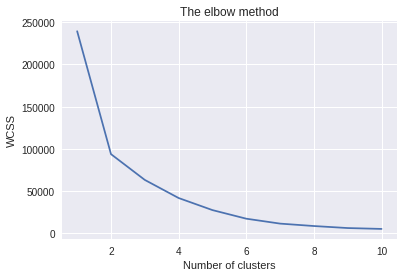

In [129]:
from sklearn.cluster import KMeans



wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(plot_dataset.values)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
X_kmeans = plot_dataset[["reviews","comp_code"]]

In [0]:
kmeans = KMeans(n_clusters = 2,n_init = 10, max_iter = 300, init = 'k-means++',random_state = 0)
kmeans.fit(X_kmeans)
labels = kmeans.predict(X_kmeans)
centroids = kmeans.cluster_centers_

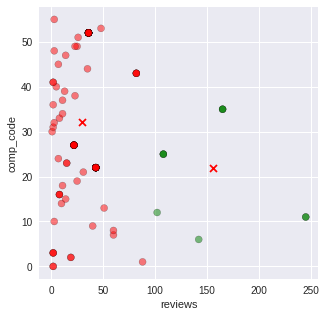

In [132]:
import numpy as np
fig = plt.figure(figsize=(5,5))

colmap = {1:'r', 2:'g',3:'b'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(plot_dataset['reviews'], plot_dataset['comp_code'], color=colors1, alpha=0.5, edgecolor='k')
plt.xlabel('reviews')
plt.ylabel('comp_code')
#plt.ylim([0, 17500])
#plt.yticks(np.arange(0, 17500, 2500))
#for idx, centroid in enumerate(centroids):
#    plt.scatter(*centroid, color=colmap[idx+1])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r')

plt.show()

In [133]:
from sklearn import metrics
sil_score = metrics.silhouette_score(X_kmeans, labels)
sil_score

0.718673024038167

### **After data enrichment the K Means Silhoutte Score increased from 0.55 to 0.71**
**This shows that clusters are better formed after enrichment.**

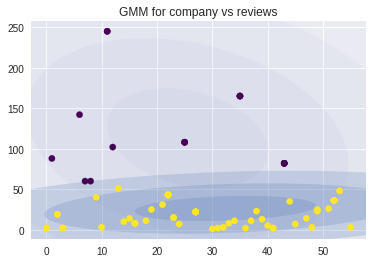

In [135]:
from sklearn.mixture import GaussianMixture
#X_gmm = results[pd.notnull(results['reviews'])]
#X_gmm = results.iloc[:,[7,11]]
#X_gmm = salaries.iloc[:, [4,8]].values

gmm = GaussianMixture(n_components=2,covariance_type='full',verbose=0,verbose_interval=10,max_iter=5000).fit(plot_dataset.values)
labels = gmm.predict(plot_dataset.values)


plt.title("GMM for company vs reviews")
plot_gmm(gmm,plot_dataset.values)

In [136]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
number_of_components=2
silhoutte_coefficients = []
gmm = GaussianMixture(n_components=number_of_components,covariance_type='full',verbose=0,verbose_interval=10,max_iter=5000).fit(plot_dataset.values)
gmm_labels = gmm.predict(plot_dataset.values)
gmm_silhoute_score = metrics.silhouette_score(plot_dataset.values, gmm_labels, metric='euclidean')
gmm_silhoute_score

0.6515133756339418

In [137]:
salaries.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


## **Linear Regression**

In [232]:
salaries.head()
salaries_reg = salaries[['experience','salary']]
salaries_cmp = salaries[['comp_code','salary']]
salaries_mul = salaries[['comp_code','loc_code','experience','salary']]
salaries_mul.head()

,comp_code,loc_code,experience,salary
0,22,1,2.0,130000.0
1,39,9,8.0,120000.0
2,12,12,1.0,71814.5
3,17,12,1.0,87500.0
4,22,12,12.0,220000.0


In [234]:
# #drop unwnated columns:
# columns = ['location','title', 'company', 'summary', 'high_salary']
# salaries_reg.drop(columns, inplace=True, axis=1)
# salaries_reg = salaries_reg[['experience','salary']]
# salaries_reg.head()

dis_x = salaries_reg.iloc[:, :-1].values
dis_y = salaries_reg.iloc[:, 1].values

cmp_x = salaries_cmp.iloc[:, :-1].values
cmp_y = salaries_cmp.iloc[:, 1].values

mul_x = salaries_mul.iloc[:, :-1].values
mul_y = salaries_mul.iloc[:, 1].values



mul_y
salaries_mul.head()

,comp_code,loc_code,experience,salary
0,22,1,2.0,130000.0
1,39,9,8.0,120000.0
2,12,12,1.0,71814.5
3,17,12,1.0,87500.0
4,22,12,12.0,220000.0


In [0]:
#dis_x = salaries_reg.drop('salary', axis = 1)
#dis_y = salaries_reg['salary']
#dis_x
#dis_y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dis_x, dis_y, test_size=0.2)
X_traincmp, X_testcmp, y_traincmp, y_testcmp = train_test_split(cmp_x, cmp_y, test_size=0.2)
X_trainmul, X_testmul, y_trainmul, y_testmul = train_test_split(mul_x, mul_y, test_size=0.2)

In [142]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(X_train)

(112, 1)
(29, 1)
(112,)
(29,)


In [0]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)


pred_1 = lRegressor.predict(X_test)



lRegressorcmp = LinearRegression()
lRegressorcmp.fit(X_traincmp, y_traincmp)


pred_cmp = lRegressorcmp.predict(X_testcmp)


lRegressormul = LinearRegression()
lRegressormul.fit(X_trainmul, y_trainmul)


pred_mul = lRegressormul.predict(X_testmul)

#print("R^2 score for Linear Regression: ",model.score(y_test,predictions))

In [0]:
#print("R^2 score for Linear Regression: ",model.score(y_test,predictions))

### Plot the Linear Regression Graph for
* **Salary vs Experience**
* **Salary vs Company**
* **Salary vs Company, location, title**



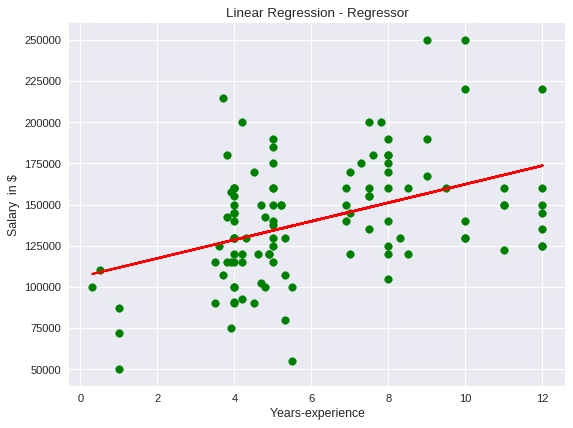

In [145]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_train, y_train, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_train,lRegressor.predict(X_train) , c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

In [146]:
from scipy import stats
gradient,intercept,r_value,p_value,std_err=stats.linregress(salaries ['experience'],salaries["salary"])

print("Gradient and intercept",gradient,intercept)
print ("p-value",p_value)

print(lRegressor.intercept_)
print(lRegressor.coef_)

Gradient and intercept 5262.827831821824 109156.28586406198
p-value 7.138422343591099e-07
106142.8508609455
[5624.10371317]


In [147]:
import statsmodels.api as sm    
model = sm.OLS(y_test, pred_1)
result = model.fit()
result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     863.5
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.38e-22
Time:                        05:02:30   Log-Likelihood:                -336.07
No. Observations:                  29   AIC:                             674.1
Df Residuals:                      28   BIC:                             675.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0233      0.035     29.385      0.000       0.952       1.095
==============================================================================
Omnibus:                        0.136   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.091
Skew:                           0.102   Prob(JB):                        0.956
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

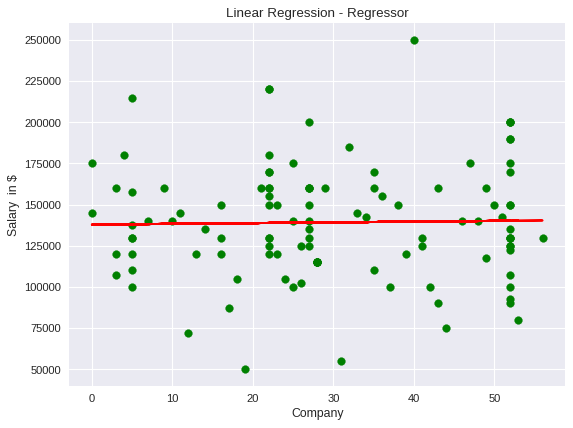

In [148]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_traincmp, y_traincmp, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_traincmp,lRegressorcmp.predict(X_traincmp) , c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Company")
plt.ylabel("Salary  in $")
plt.show()

In [149]:
import statsmodels.api as sm    
model = sm.OLS(y_testcmp, pred_cmp)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     570.7
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           3.66e-20
Time:                        05:02:33   Log-Likelihood:                -343.29
No. Observations:                  29   AIC:                             688.6
Df Residuals:                      28   BIC:                             689.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0869      0.045     23.889      0.000       0.994       1.180
==============================================================================
Omnibus:                        3.085   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.685
Skew:                           0.351   Prob(JB):                        0.431
Kurtosis:                       3.949   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*<b> Here we tried to predict **Salary**, given all other features<b>
* R-squared is the percentage of dependent variable movements that can be explained by movements in a independent variable.


### **From the test R-squared value, we can conclude that there is a strong relationship between Experience and Salary variables in the data, as R-squared is greater than 0.9.**

In [150]:
from scipy import stats
gradient,intercept,r_value,p_value,std_err=stats.linregress(salaries ['experience'],salaries["salary"])

print("Gradient and intercept",gradient,intercept)
print ("p-value",p_value)

print(lRegressorcmp.intercept_)
print(lRegressorcmp.coef_)

Gradient and intercept 5262.827831821824 109156.28586406198
p-value 7.138422343591099e-07
137860.28580996726
[44.70909042]


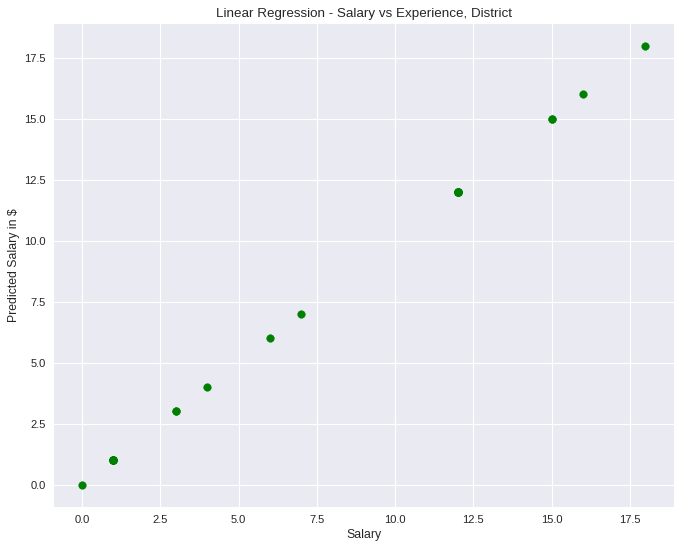

In [151]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(y_testmul, pred_mul, c='g')
#plt.scatter(X_train, y_train)
#plt.plot(X_testmul, pred_mul, c='r')
plt.title("Linear Regression - Salary vs Experience, District")
plt.xlabel("Salary")
plt.ylabel("Predicted Salary in $")
plt.show()

In [152]:
from scipy import stats
gradient,intercept,r_value,p_value,std_err=stats.linregress(salaries ['experience'],salaries["salary"])

print("Gradient and intercept",gradient,intercept)
print ("p-value",p_value)

print(lRegressormul.intercept_)
print(lRegressormul.coef_)

Gradient and intercept 5262.827831821824 109156.28586406198
p-value 7.138422343591099e-07
6.217248937900877e-15
[ 8.76083611e-19  1.00000000e+00 -5.55111512e-17]


In [153]:
import statsmodels.api as sm    
model = sm.OLS(y_testmul, pred_mul)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.675e+32
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        05:02:39   Log-Likelihood:                 921.24
No. Observations:                  29   AIC:                            -1840.
Df Residuals:                      28   BIC:                            -1839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   7.73e-17   1.29e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       53.163   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.931
Skew:                           0.065   Prob(JB):                        0.140
Kurtosis:                       1.201   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Finding Latent Manifold **

* **Initially Linear regression model was applied considering only ‘experience’ feature to predict ‘salary’. It is clear there exists many outliers from the plot. Obtained R^2 value of 0.950.**

* **After looking into other attributes of these outliers, we found that there are 2 more attributes that directly affect the salary are job location and company code. Applying linear regression with features ‘job location’, ‘company code’ increased the R^2 value to 1.0 indicating these features play a major role in predicting the salary values accurately.**

## Apply Sigmoid function

[7.14248671 1.12930053]


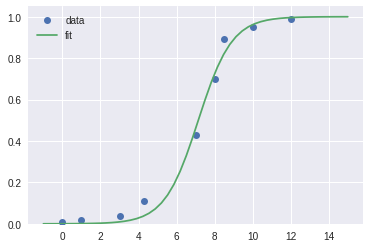

In [154]:
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])
#ydata = dis_x
#xdata = np.array([dis_y])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.show()

In [155]:
# salaries.company = pd.Categorical(salaries.company)
# salaries['comp_code'] = salaries.company.cat.codes
# salaries= salaries[['location','title','company','summary','salary','loc_code','comp_code','high_salary']]
salaries.head()
#salaries.shape

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


### Assigning High salary and Low salary based on Median values

In [0]:
salaries['high_salary'] = [1 if i > median_salary else 0 for i in salaries.salary]

In [157]:
salaries.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


## Apply Logistic Regression

### Predict whether Salary is above median or below median

### Plotting the Salary vs Location graph

Text(0,0.5,'Salary')

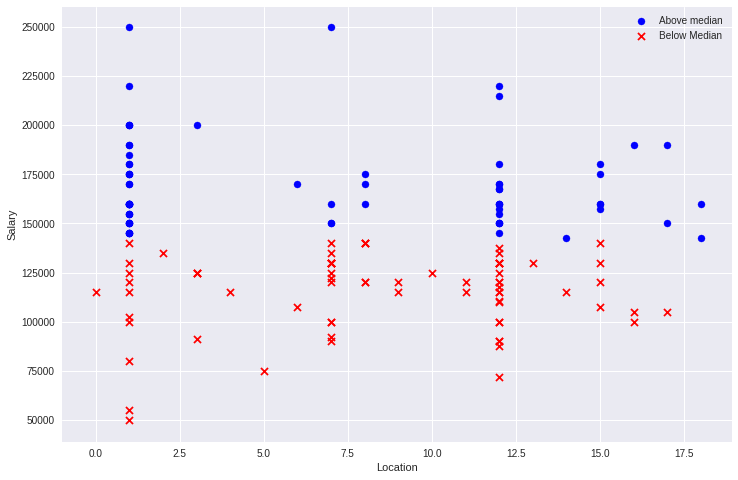

In [158]:
positive = salaries[salaries['high_salary'].isin([1])]  
negative = salaries[salaries['high_salary'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['loc_code'], positive['salary'], s=50, c='b', marker='o', label='Above median')  
ax.scatter(negative['loc_code'], negative['salary'], s=50, c='r', marker='x', label='Below Median')  
ax.legend()  
ax.set_xlabel('Location')  
ax.set_ylabel('Salary')  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


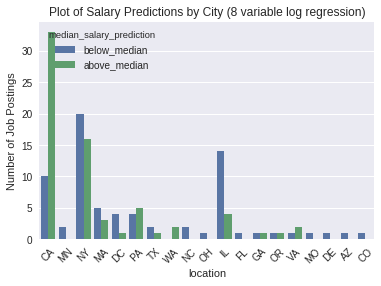

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
city_predictions = pd.DataFrame(salaries[["location", "high_salary"]])
city_predictions['median_salary_prediction'] = city_predictions.high_salary.map({0:"below_median", 1:"above_median"})
sns.countplot(x="location", hue="median_salary_prediction", data=city_predictions)
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.title('Plot of Salary Predictions by City (8 variable log regression)')
plt.show()

In [0]:
salaries_w_desc = salaries[salaries.summary.notnull()]

X_title = salaries_w_desc.title
y_title = salaries_w_desc.high_salary

In [161]:
salaries.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


## Applying Logistic regression for 
* **Title vs High Salary**
* ** Salary, Location, Company vs High Salary**
* ** Salary, Location vs High Salary**


In [162]:
cv = CountVectorizer(stop_words="english")
cv.fit(X_title)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [163]:
len(cv.get_feature_names())

6

In [0]:
X_title_trans = pd.DataFrame(cv.transform(X_title).todense(), columns=cv.get_feature_names())

In [0]:
X_train, X_test, y_train, y_test = train_test_split(np.asmatrix(X_title_trans), y_title, test_size=0.3,
                                                    random_state=59)

In [166]:
# Applying Logistic regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
y_pred = regressor.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


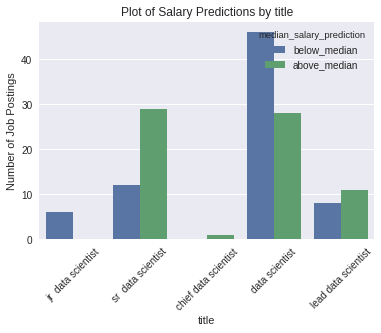

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
city_predictions = pd.DataFrame(salaries[["title", "high_salary"]])
city_predictions['median_salary_prediction'] = city_predictions.high_salary.map({0:"below_median", 1:"above_median"})
sns.countplot(x="title", hue="median_salary_prediction", data=city_predictions)
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.title('Plot of Salary Predictions by title')
plt.show()

### Predicting the accuracy score

In [169]:
# Predicting the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.5116279069767442

In [170]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.43333333 0.69230769]
recall: [0.76470588 0.34615385]
fscore: [0.55319149 0.46153846]
support: [17 26]


In [0]:
filtered_data = salaries

In [172]:
salaries.head()

,location,title,company,summary,salary,loc_code,comp_code,high_salary,experience
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,130000.0,1,22,0,2.0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,120000.0,9,39,0,8.0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,71814.5,12,12,0,1.0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,87500.0,12,17,0,1.0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,220000.0,12,22,1,12.0


## Applying Logistic regression for Salary, Location and Company vs High Salary

In [173]:
X = filtered_data.iloc[:,4:7]
y = filtered_data['high_salary']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: high_salary, dtype: int64

In [174]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        
    return result

result = normalize(X)
result.head(10)

,salary,loc_code,comp_code
0,0.400000,0.055556,0.392857
1,0.350000,0.500000,0.696429
2,0.109073,0.666667,0.214286
3,0.187500,0.666667,0.303571
4,0.850000,0.666667,0.392857
5,0.550000,0.444444,0.017857
6,0.675000,0.055556,0.571429
7,0.400000,0.666667,1.000000
8,0.200000,0.666667,0.964286
9,0.250000,0.666667,0.750000


In [175]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: high_salary, dtype: int64

In [0]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#print(y_train)

In [177]:
y_train.shape

(112,)

In [178]:
y_test.shape

(29,)

In [179]:
# Applying Logistic regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
# Predicting the test results
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1])

### Predicting the accuracy score

In [181]:
# Predicting the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.896551724137931

In [182]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.9375     0.84615385]
recall: [0.88235294 0.91666667]
fscore: [0.90909091 0.88      ]
support: [17 12]


## Applying Logistic regression for Salary, Location vs High Salary

In [183]:
X = filtered_data.iloc[:,4:6]
y = filtered_data['high_salary']
X.head()

,salary,loc_code
0,130000.0,1
1,120000.0,9
2,71814.5,12
3,87500.0,12
4,220000.0,12


In [184]:
result = normalize(X)
result.head(10)

,salary,loc_code
0,0.400000,0.055556
1,0.350000,0.500000
2,0.109073,0.666667
3,0.187500,0.666667
4,0.850000,0.666667
5,0.550000,0.444444
6,0.675000,0.055556
7,0.400000,0.666667
8,0.200000,0.666667
9,0.250000,0.666667


In [185]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

X_train.shape
y_train.shape

(112,)

In [186]:
# Applying Logistic regression
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [187]:
# Predicting the test results
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1])

### Calculating Accuracy, Precision, Recall and FScores

In [188]:
# Predicting the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6551724137931034

In [192]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7194444444444444, 0.6936274509803921, 0.6514423076923076, None)

In [193]:

precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.88888889 0.55      ]
recall: [0.47058824 0.91666667]
fscore: [0.61538462 0.6875    ]
support: [17 12]


## **Decision Trees**


*   **Decision Tree is a classsification algorithm. They identify various ways to split the dataset into branch like segments**.
*   **We have trained the decision tree model by selecting - location_code,company_code and title_code.**
* **Based on these features the model predicts whether the salary is above or below median.**



In [194]:

salaries.title = pd.Categorical(salaries.title)
salaries['title_code'] = salaries.title.cat.codes
salaries= salaries[['location','title','company','summary','title_code','salary','loc_code','comp_code','experience','high_salary']]
salaries.head()

,location,title,company,summary,title_code,salary,loc_code,comp_code,experience,high_salary
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,2,130000.0,1,22,2.0,0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,4,120000.0,9,39,8.0,0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,2,71814.5,12,12,1.0,0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,2,87500.0,12,17,1.0,0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,0,220000.0,12,22,12.0,1


In [195]:
salaries.head()

,location,title,company,summary,title_code,salary,loc_code,comp_code,experience,high_salary
0,CA,jr data scientist,Harnham,associate data scientist exciting opportunity ...,2,130000.0,1,22,2.0,0
1,MN,sr data scientist,RED SKY Consulting,data architect bi architect data scientist dat...,4,120000.0,9,39,8.0,0
2,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,establish monitor best practice policy procedu...,2,71814.5,12,12,1.0,0
3,NY,jr data scientist,"Envisagenics, Inc.",looking expert machine learning genomics rnase...,2,87500.0,12,17,1.0,0
4,NY,chief data scientist,Harnham,chief data scientist consulting chief data sci...,0,220000.0,12,22,12.0,1


In [0]:
#col = ["loc_code","experience","comp_code","title_code"]
col = ["loc_code","comp_code","title_code"]
DtreeX = salaries[col]
DtreeY = salaries['high_salary']
#print(DtreeX)


In [0]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(DtreeX, DtreeY, test_size=0.2, random_state = 0)

In [0]:
#!pip install pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from IPython.display import Image, display
from subprocess import call
import pydotplus
import collections

In [200]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# !pip install --upgrade graphviz
# !pip install --upgrade pydot


# %%bash
# /usr/bin/yes | apt-get install graphviz
# pip install --upgrade graphviz
# /usr/bin/yes | pip uninstall pyparsing
# pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz
# pip install --upgrade pydot

In [203]:
#!pip install graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['title_code','loc_code','comp_code'],class_names=['Above-Mean', 'Below-Mean'],filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)


colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png("/content/drive/My Drive/CSV/decisiontree.png")

True

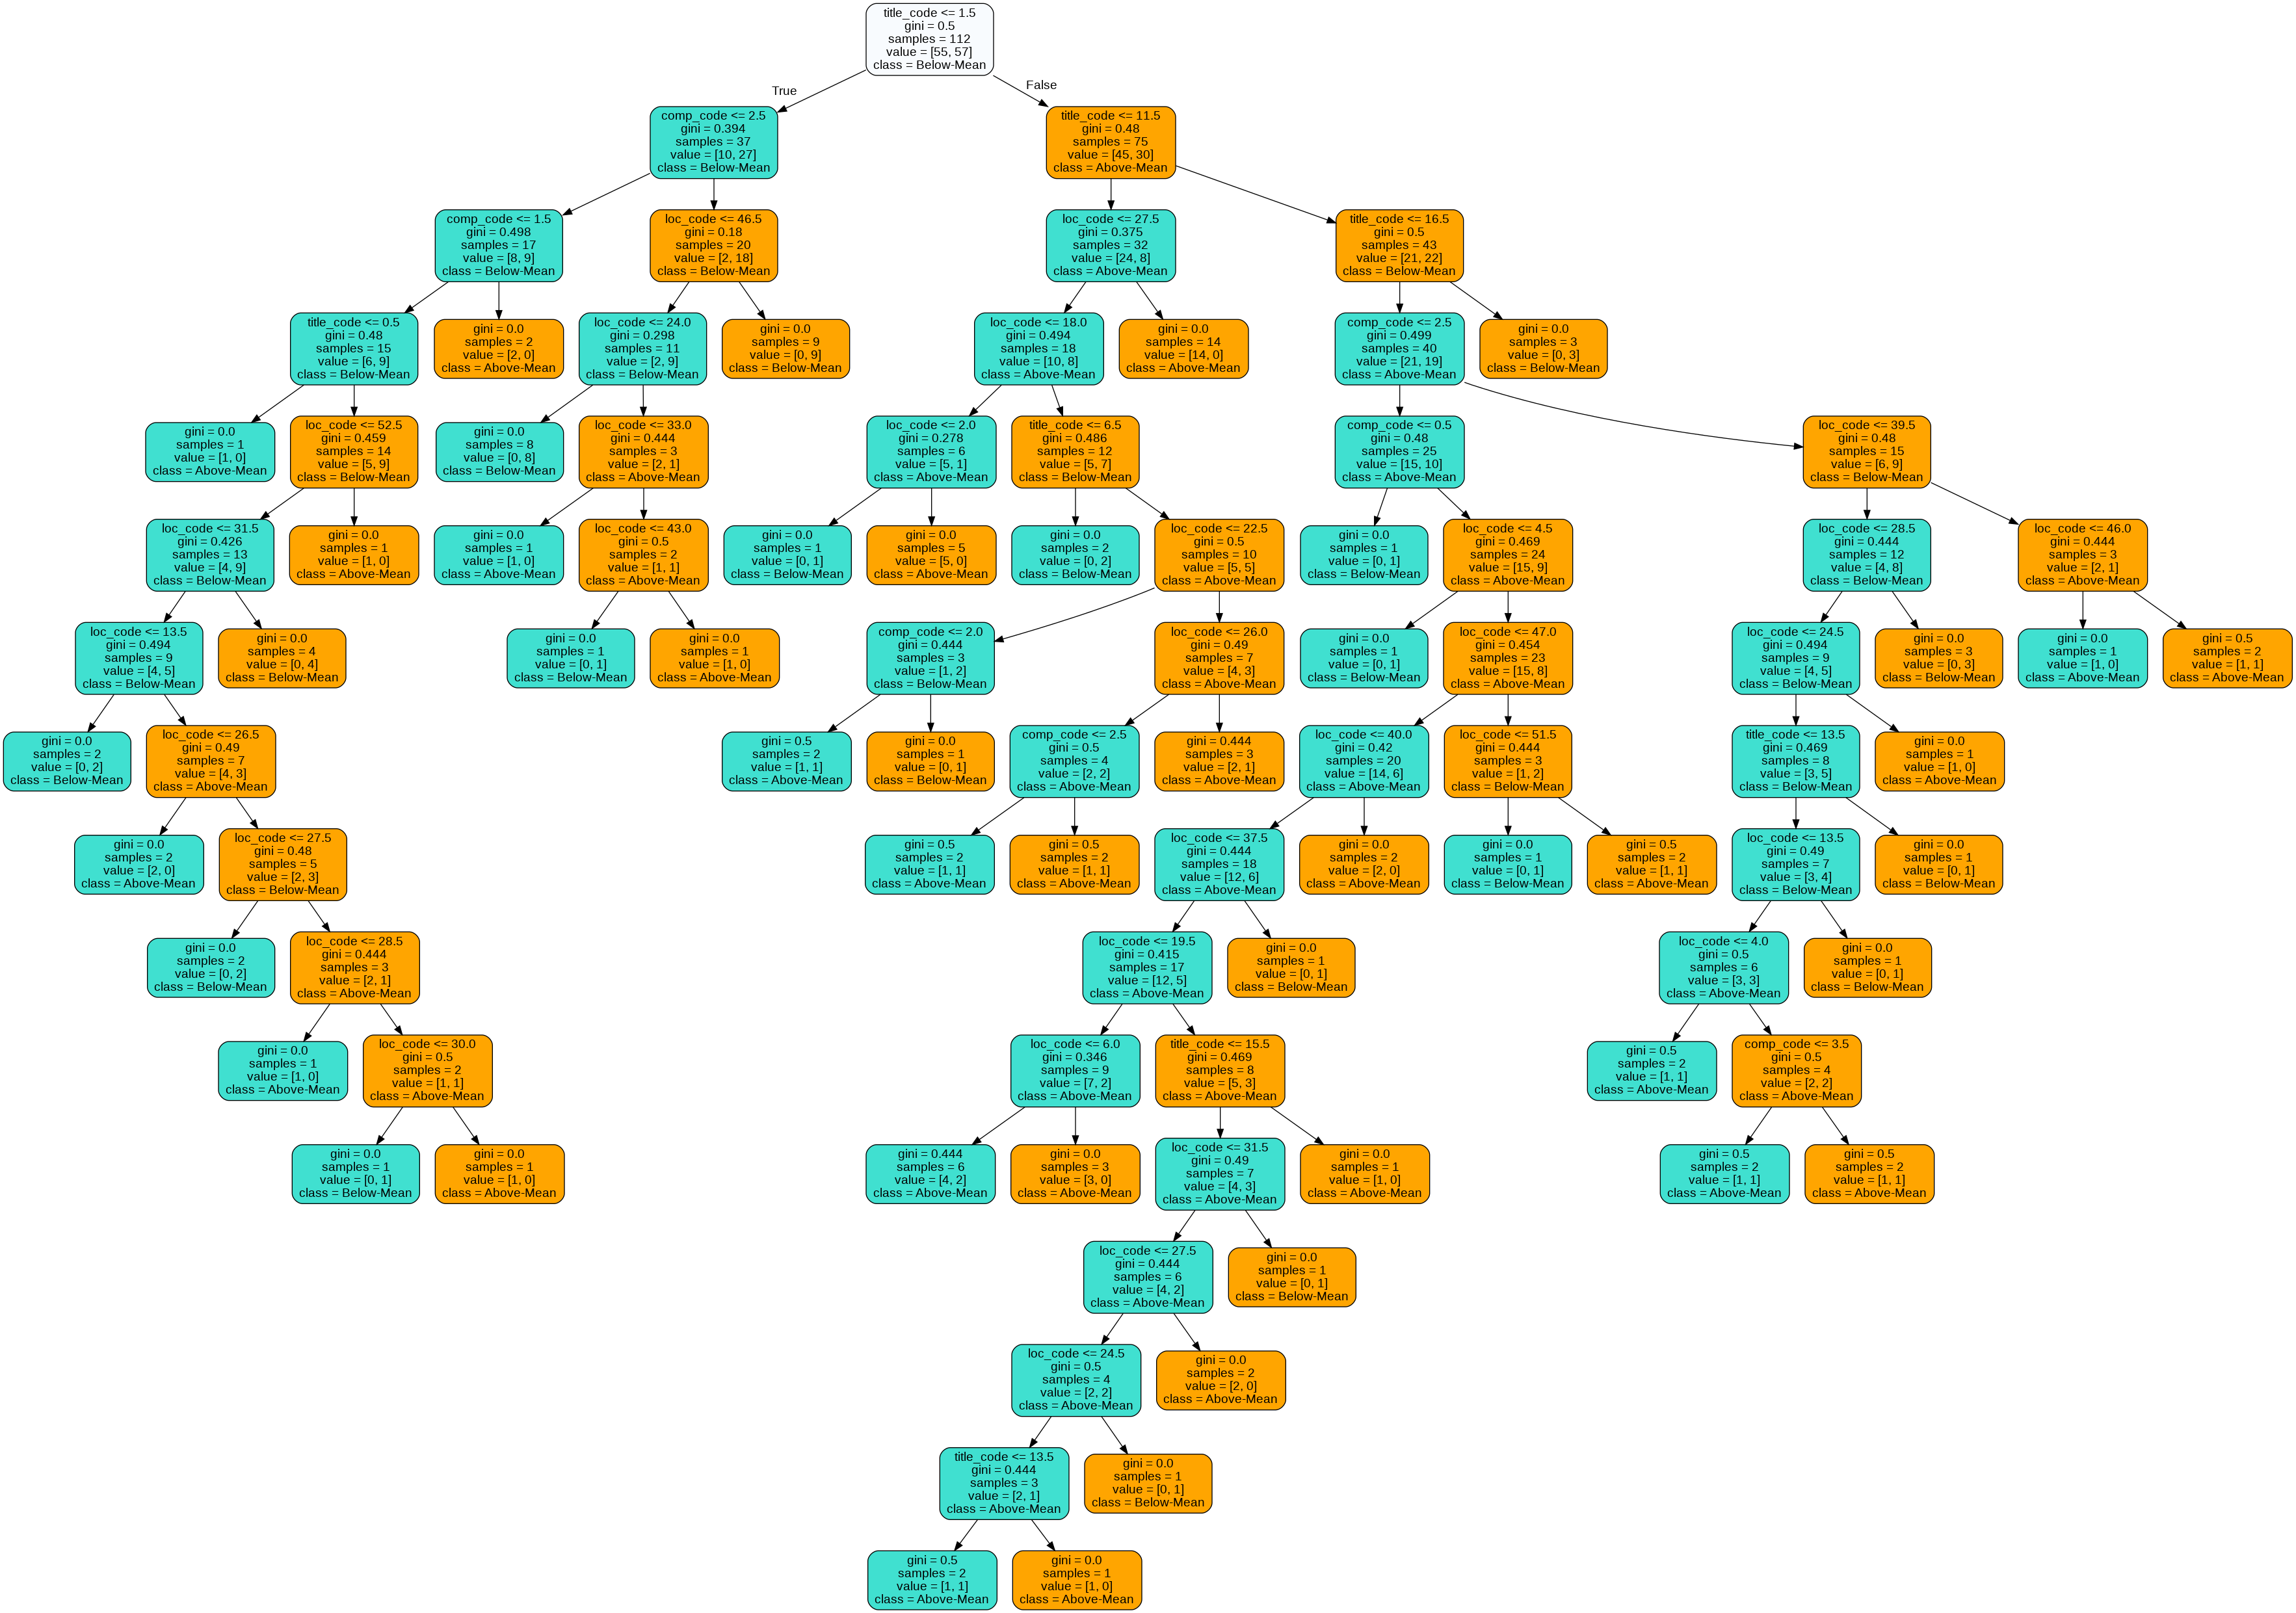

In [204]:
from IPython.display import Image
#PATH = !pwd
Image(filename = "/content/drive/My Drive/CSV/decisiontree.png")



## *    **Heat Map for Visualization**




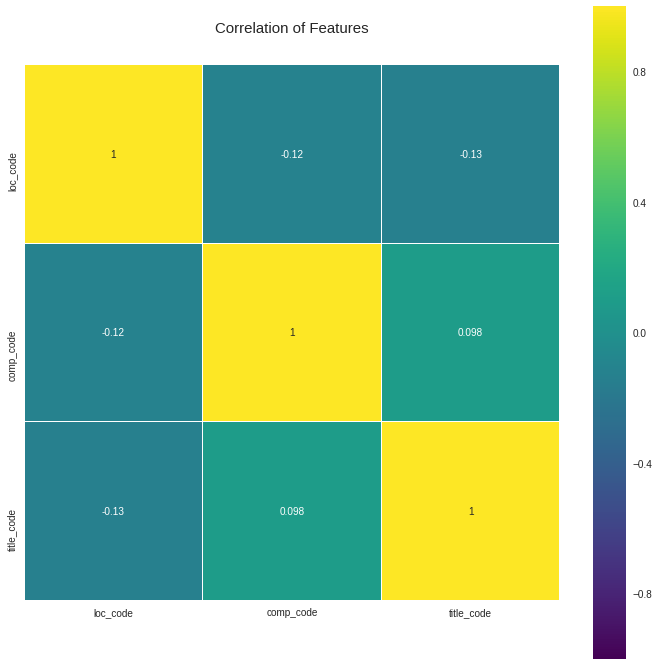

In [206]:

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(DtreeX.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [207]:
X_test_DT.head()

,loc_code,comp_code,title_code
45,1,52,1
60,12,43,1
7,12,56,1
51,1,11,1
66,10,41,1




### *   **Predicting with Test Data**
###*   **Calculating Accuracy score **



In [208]:

prediction = clf.predict(X_test_DT)
print(prediction)

[1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0]


In [209]:
acc_decision_tree = round(clf.score(X_train_DT, y_train_DT) * 100, 2)
acc_decision_tree

89.29

In [210]:
acc_decision_tree = round(clf.score(X_test_DT, y_test_DT) * 100, 2)
acc_decision_tree

72.41

In [211]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_DT,prediction))
print(confusion_matrix(y_test_DT,prediction))

             precision    recall  f1-score   support

          0       0.80      0.71      0.75        17
          1       0.64      0.75      0.69        12

avg / total       0.73      0.72      0.73        29

[[12  5]
 [ 3  9]]


## **Random Forests**

Random forests are easier to implement and it gives accurate prediction scores as it averages the predictions of number of decision trees. The prediciton is based on voting.


*   **Selected random samples from the dataset**
*   **For each sample decision tree was constructed and prediction result was obtained.**
*   **The prediction with most number of votes were selected.**
*   **It minimises the cause of overfitting as it cancels out the bias due to the overall predictions**











In [212]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(DtreeX,DtreeY)

# prediction on test set
y_pred=clf.predict(X_test_DT)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

#print("Accuracy:",metrics.accuracy_score(y_test_DT, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test_DT, y_pred))

Accuracy: 0.9310344827586207



*  ** With Random Forests we got an accuracy of 93%**




### **Calculating Out-of-Bag errors**

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

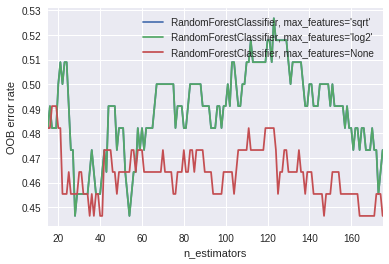

In [213]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_DT,y_train_DT)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


## **Calculating Feature Importance **

In [214]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train_DT.columns).sort_values(ascending=False)
feature_imp

comp_code     0.524960
loc_code      0.313852
title_code    0.161188
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


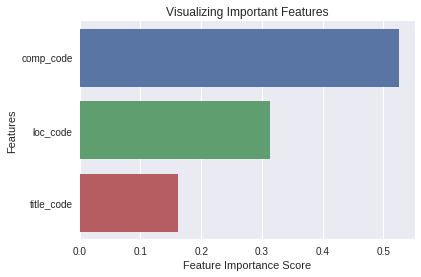

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### **Since all the Features we tested for gave importance of more than 0.05, so we did not remove any features.**

## **Applying K- Nearest Neighbors**

In [216]:

from sklearn.preprocessing import StandardScaler 

from sklearn.neighbors import KNeighborsClassifier 
knn_fit = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski') 
knn_fit.fit(X_train_DT,y_train_DT) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### **KNN Accuracy Score and Confusion Matrix**

In [217]:
 
print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train_DT, knn_fit.predict(X_train_DT),rownames = ["Actual"],colnames = ["Predicted"]) )      
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train_DT, knn_fit.predict(X_train_DT)),3)) 
print ("\nK-Nearest Neighbors - Train Classification Report\n", classification_report( y_train_DT,knn_fit.predict(X_train_DT))) 
 
print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test_DT, knn_fit.predict(X_test_DT),rownames = ["Actual"],colnames = ["Predicted"]))       
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score( y_test_DT,knn_fit.predict(X_test_DT)),3)) 
print ("\nK-Nearest Neighbors - Test Classification Report\n", classification_report(y_test_DT,knn_fit.predict(X_test_DT))) 
 


K-Nearest Neighbors - Train Confusion Matrix

 Predicted   0   1
Actual           
0          39  16
1           9  48

K-Nearest Neighbors - Train accuracy: 0.777

K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.81      0.71      0.76        55
          1       0.75      0.84      0.79        57

avg / total       0.78      0.78      0.78       112



K-Nearest Neighbors - Test Confusion Matrix

 Predicted  0   1
Actual          
0          9   8
1          1  11

K-Nearest Neighbors - Test accuracy: 0.69

K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.90      0.53      0.67        17
          1       0.58      0.92      0.71        12

avg / total       0.77      0.69      0.68        29



## **Applying Naive Bayes**

*   Naive bayes Classification is applied to dataset, by considering location, title and company.
*  Location, title and company are considered independant features. 
*  The probability of salary being above mean / below mean is calculated.

In [0]:
X = salaries.iloc[:, [4,6,7]].values
X

In [262]:
Y = salaries.iloc[:, 9].values
Y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0])

In [263]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
X_train
Y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1])

In [264]:

# Fitting classifier to training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [265]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.89892015, 0.09585223])

In [266]:
# Fitting classifier to training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [267]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0])

## **Visualization**

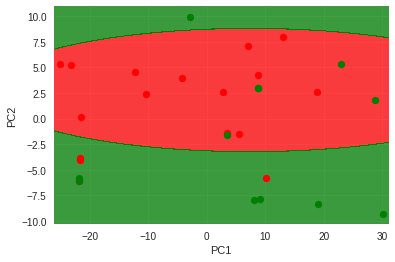

In [268]:
#Visualizing

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label =j)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    #plt.legend()
plt.show()

In [269]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0])

### **Naive Bayes Score and Confusion Matrix**

In [270]:

# Compute the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_test, y_pred)

0.6896551724137931

In [271]:
# Compute confusion matrix
confusion_matrix(Y_test, y_pred)

array([[13,  4],
       [ 5,  7]])

### **Naive Bayes did not perform well as compared to random forests and decision tree classifier, since it considers features  independent to each other.**
* **To optimize this, we may need to combine Naive Bayes with other statistical techniques to help guide towards what features best classify and that we did using decision trees.**

## **Support Vector Machine **



*   Support Vector Machine is applied to dataset, by considering location, title and company.
*  Location, title and company are considered independant features. 
*  The probability of salary being above mean / below mean is calculated.






In [0]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [238]:
clf.fit(X_train_DT, y_train_DT)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
pred = clf.predict(X_test_DT)

### **SVM - Score**

In [241]:
print("R^2 score for Linear Regression: ", clf.score(X_test_DT,y_test_DT))

R^2 score for Linear Regression:  0.7586206896551724


In [243]:
print(accuracy_score(y_test_DT, pred))

0.7586206896551724


# Conclusion:
* In this project, we tried to predict the **Salary** for **Job Posting** based on given **location, job title, company code, company reviews, years of experience and job summary**.
* Initially we started with job summary as our primary feature for identifying the job salary but we were not able to infer much from it due to our limited knowledge in NLP.
* We enriched our data set to include company **location** and company **reviews**. Adding these features gave us better insight and we were able to infer that location has a linear dependency on the salary. Adding reviews helped us infer that companies popularity also can be used to predict the variance in company's salary.
* From this project, we concluded that the salary can vary based on the company location for similar job title and job summary. If we get more data to train the model for various job titles, we will be able to predict the salary more accurately.Currently we limited our scope to data scientists and relevant job titles.
* The best model to predict the salary for given problem and data set is **Random forest**. Decision tree also gave good prediction for training data but it was not able to perform well for testing data. This is because of tendency of Decision tree to overfit. This was overcome by random forest  which gave 93% accuracy for testing data and performed well for both training and testing.